# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [24]:
import pandas as pd

# Caminho para o arquivo
caminho_arquivo = r'C:\Users\Acer\Desktop\mod 6 tarefa 3\b1abb33c4f.csv'

# Carregando o arquivo usando o Pandas
dados_sinasc_RO_2019 = pd.read_csv(caminho_arquivo)

# Verificando as primeiras linhas do DataFrame
print(dados_sinasc_RO_2019.head())


   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [25]:


# Supondo que 'dados_sinasc_RO_2019' seja o DataFrame que contém os dados carregados do arquivo CSV

# Definindo os intervalos e rótulos para categorização da variável APGAR5
intervalos = [-1, 3, 5, 7, 10]
rotulos = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Criando uma nova coluna 'Categoria_APGAR5' no DataFrame com as categorias
dados_sinasc_RO_2019['Categoria_APGAR5'] = pd.cut(dados_sinasc_RO_2019['APGAR5'], bins=intervalos, labels=rotulos, right=False)

# Visualizando as primeiras linhas do DataFrame com a nova coluna
print(dados_sinasc_RO_2019[['APGAR5', 'Categoria_APGAR5']].head())


   APGAR5 Categoria_APGAR5
0    10.0              NaN
1     9.0           normal
2    10.0              NaN
3    10.0              NaN
4    10.0              NaN


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

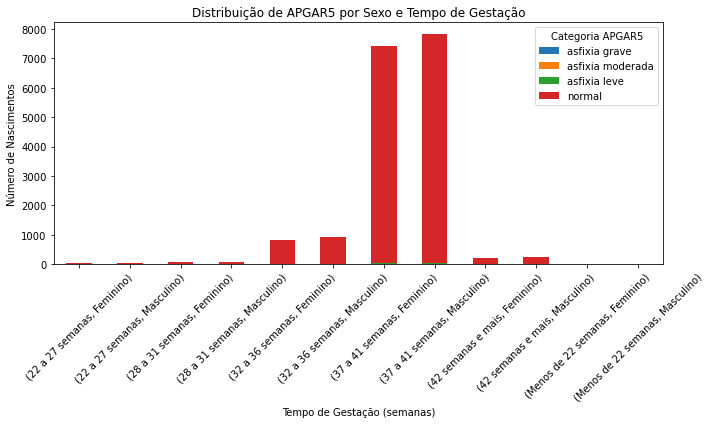

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Vamos supor que você já tenha carregado os dados e o DataFrame seja 'dados_sinasc_RO_2019'

# Agrupar os dados por GESTACAO, sexo e Categoria_APGAR5, e contar o número de ocorrências
dados_agrupados = dados_sinasc_RO_2019.groupby(['GESTACAO', 'SEXO', 'Categoria_APGAR5']).size().unstack(fill_value=0)

# Plotar o gráfico de barras empilhadas
dados_agrupados.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação (semanas)')
plt.ylabel('Número de Nascimentos')
plt.legend(title='Categoria APGAR5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [27]:
import pandas as pd

# Vamos supor que você já tenha carregado os dados e o DataFrame seja 'dados_sinasc_RO_2019'

# Criar a tabela cruzada
tabela_cruzada = pd.crosstab(dados_sinasc_RO_2019['GESTACAO'], dados_sinasc_RO_2019['APGAR5'])

# Exibir a tabela cruzada
print(tabela_cruzada)


APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [28]:
# Calcular os percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Arredondar os valores para duas casas decimais
percentuais_linha = percentuais_linha.round(2)

# Exibir os percentuais de linha
print(percentuais_linha)


APGAR5                0.0   1.0    2.0   3.0   4.0   5.0   6.0    7.0    8.0   \
GESTACAO                                                                        
22 a 27 semanas       8.24  0.00   9.41  7.06  1.18  0.00  2.35  11.76  28.24   
28 a 31 semanas       0.00  0.00   1.23  0.62  3.09  4.32  4.32   6.79  37.65   
32 a 36 semanas       0.09  0.09   0.09  0.09  0.36  0.49  0.76   2.51  16.20   
37 a 41 semanas       0.02  0.09   0.01  0.02  0.03  0.09  0.20   0.67   6.29   
42 semanas e mais     0.14  0.00   0.00  0.00  0.00  0.14  0.14   0.72   6.30   
Menos de 22 semanas  14.29  0.00  14.29  0.00  0.00  0.00  0.00  14.29   0.00   

APGAR5                9.0    10.0  
GESTACAO                           
22 a 27 semanas      22.35   9.41  
28 a 31 semanas      33.95   8.02  
32 a 36 semanas      58.50  20.81  
37 a 41 semanas      60.23  32.34  
42 semanas e mais    60.60  31.95  
Menos de 22 semanas  42.86  14.29  


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

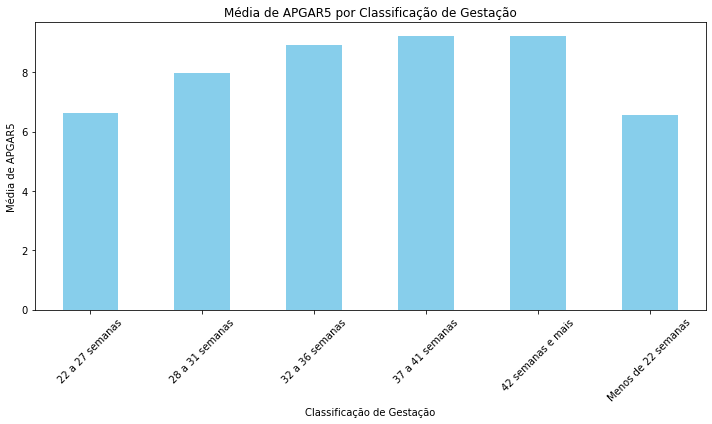

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
caminho_arquivo = r'C:\Users\Acer\Desktop\mod 6 tarefa 3\b1abb33c4f.csv'
dados = pd.read_csv(caminho_arquivo)

# Gráfico de barras
plt.figure(figsize=(10, 6))

# Agrupar os dados pela classificação de gestação e calcular a média de APGAR5 para cada grupo
dados_agrupados = dados.groupby('GESTACAO')['APGAR5'].mean()

# Plotar o gráfico de barras
dados_agrupados.plot(kind='bar', color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Classificação de Gestação')
plt.ylabel('Média de APGAR5')
plt.title('Média de APGAR5 por Classificação de Gestação')

# Mostrar o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

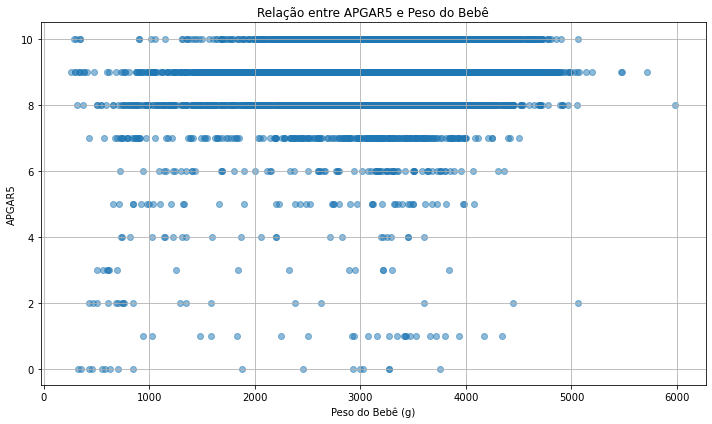

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
caminho_arquivo = r'C:\Users\Acer\Desktop\mod 6 tarefa 3\b1abb33c4f.csv'
dados = pd.read_csv(caminho_arquivo)

# Filtrar os dados para remover valores nulos de peso do bebê e APGAR5
dados_filtrados = dados.dropna(subset=['PESO', 'APGAR5'])

# Gráfico de dispersão
plt.figure(figsize=(10, 6))

# Plotar o gráfico de dispersão
plt.scatter(dados_filtrados['PESO'], dados_filtrados['APGAR5'], alpha=0.5)

# Adicionar rótulos e título
plt.xlabel('Peso do Bebê (g)')
plt.ylabel('APGAR5')
plt.title('Relação entre APGAR5 e Peso do Bebê')

# Mostrar o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()
